In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
import pickle
import csv
import pandas as pd

---

<h1><center>SDSE Final Project (Group 11) <br><br> 2. Heatmaps  </center></h1>

---

After this demo, you will be able to understand:
1. Understand how the dataset is cleaned/organized for Heatmaps
2. Compare results and analyze correlated data

## 1) Load the Data 
+ Load the data file `Salary Data.csv` into a Pandas dataframe using [`pd.read_csv`]

In [22]:
df = pd.read_csv('Salary Data.csv')
df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
370,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0
371,43.0,Male,Master's,Director of Operations,19.0,170000.0
372,29.0,Female,Bachelor's,Junior Project Manager,2.0,40000.0
373,34.0,Male,Bachelor's,Senior Operations Coordinator,7.0,90000.0


## 2) Data Cleaning
+ Perform the same data cleaning process but in one box of code.
    + Contains removing null values and classifying releveant objects as binary, multiclass values.  

In [23]:
education_map = []
for value in df.loc[:, 'Education Level']:
    if value == "Bachelor's":
        education_map.append(0)
    elif value == "Master's":
        education_map.append(1)
    elif value == "PhD":
        education_map.append(2)
    else:
        education_map.append(-1)

gender_map = []
for value in df.loc[:, 'Gender']:
    if value == "Female":
        gender_map.append(0)
    elif value == "Male":
        gender_map.append(1)
    else:
        gender_map.append(-1)

df['Education Level'] = education_map
df['Gender'] = gender_map

df = df.drop(df[df['Education Level'] == -1].index)
df = df.drop(df[df['Gender'] == -1].index)

df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,1,0,Software Engineer,5.0,90000.0
1,28.0,0,1,Data Analyst,3.0,65000.0
2,45.0,1,2,Senior Manager,15.0,150000.0
3,36.0,0,0,Sales Associate,7.0,60000.0
4,52.0,1,1,Director,20.0,200000.0
...,...,...,...,...,...,...
370,35.0,0,0,Senior Marketing Analyst,8.0,85000.0
371,43.0,1,1,Director of Operations,19.0,170000.0
372,29.0,0,0,Junior Project Manager,2.0,40000.0
373,34.0,1,0,Senior Operations Coordinator,7.0,90000.0


## 3) Extract All Numerical Values
+ Decided to remove non-numerical values to have a clear, updated dataset we can work with

In [24]:
numeric_df = df.drop(columns = ['Job Title'])
numeric_df

,Age,Gender,Education Level,Years of Experience,Salary
0,32.0,1,0,5.0,90000.0
1,28.0,0,1,3.0,65000.0
2,45.0,1,2,15.0,150000.0
3,36.0,0,0,7.0,60000.0
4,52.0,1,1,20.0,200000.0
...,...,...,...,...,...
370,35.0,0,0,8.0,85000.0
371,43.0,1,1,19.0,170000.0
372,29.0,0,0,2.0,40000.0
373,34.0,1,0,7.0,90000.0


## 4) Determine Correlation Between All Extracted Variables
+ Use the .corr() function to determine correlation coefficients between numerical variables

In [25]:
corr = numeric_df.corr()
corr

,Age,Gender,Education Level,Years of Experience,Salary
Age,1.000000,-0.020324,0.562693,0.979128,0.922335
Gender,-0.020324,1.000000,-0.044717,0.002884,0.071106
Education Level,0.562693,-0.044717,1.000000,0.590863,0.670371
Years of Experience,0.979128,0.002884,0.590863,1.000000,0.930338
Salary,0.922335,0.071106,0.670371,0.930338,1.000000


## 5) Heatmap representation of Correlation 
+ Use the .heatmap() function to map out the correlation coefficients along with color mapping and intensity

<Axes: >

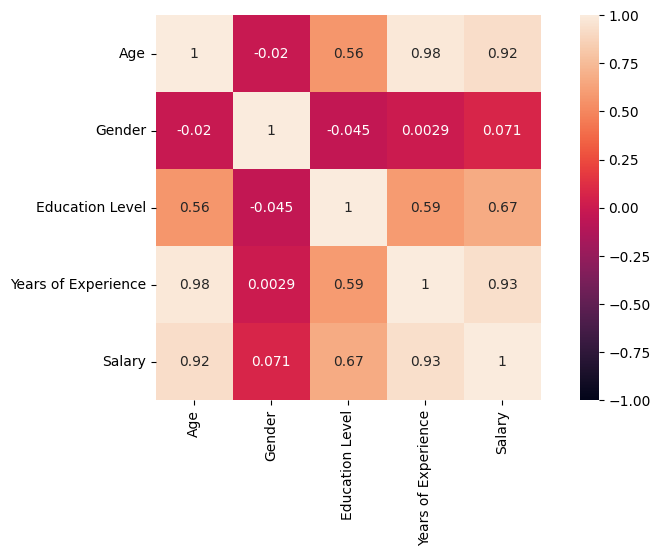

In [20]:

plt.figure(figsize = (10, 5))
sns.heatmap(corr, annot = True, square = True, vmin = -1, vmax = 1)
